# Course 3 Automatidata project
## Course 3 - Go Beyond the Numbers: Translate Data into Insights
***

The senior data analyst at Automatidata, requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. 
The management team is asking for data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a 

* box plot of the ride durations and some time series plots, like a breakdown by quarter or month.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, 
* create a Tableau dashboard showing a New York City map of taxi/limo trips by month. 

In [2]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
taxi_2017_raw = pd.read_csv("../raw_data/2017_Yellow_Taxi_Trip_Data.csv")
taxi_2017_raw.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
taxi_2017_raw = taxi_2017_raw.rename(columns = {"Unnamed: 0":"trip_ID"})

In [5]:
taxi_2017_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_ID                22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### PACE: Plan
#### Identify any outliers:
* What methods are best for identifying outliers?
* How do you make the decision to keep or exclude outliers from any future models?

In [6]:
taxi_2017_raw.isnull().sum()

trip_ID                  0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
taxi_2017_raw["tpep_pickup_datetime"] = pd.to_datetime(taxi_2017_raw["tpep_pickup_datetime"])
taxi_2017_raw["tpep_dropoff_datetime"] = pd.to_datetime(taxi_2017_raw["tpep_dropoff_datetime"])

taxi_2017_raw.head()


,trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [8]:
taxi_2017_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trip_ID                22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [9]:
taxi_2017_raw.describe()

,trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295


In [10]:
taxi_2017_raw.isna().sum()

trip_ID                  0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [11]:
taxi_2017_raw.shape

(22699, 18)

In [12]:
taxi_2017_raw["dropoff_date"] = taxi_2017_raw["tpep_dropoff_datetime"].dt.date
taxi_2017_raw["pickup_date"] = taxi_2017_raw["tpep_pickup_datetime"].dt.date

taxi_2017_raw.head()

,trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff_date,pickup_date
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25,2017-03-25
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11,2017-04-11
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15,2017-12-15
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07,2017-05-07
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15,2017-04-15


In [13]:
full_calendar_2017 = pd.date_range(start = "2017-01-01", end= "2017-12-31")

full_calendar_2017.difference(taxi_2017_raw["pickup_date"])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [14]:
full_calendar_2017.difference(taxi_2017_raw["dropoff_date"])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [25]:
taxi_2017_raw[ taxi_2017_raw.duplicated(subset= ["tpep_pickup_datetime","tpep_dropoff_datetime"],keep= False)]

,trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff_date,pickup_date


In [26]:
df = taxi_2017_raw

<Axes: xlabel='trip_distance'>

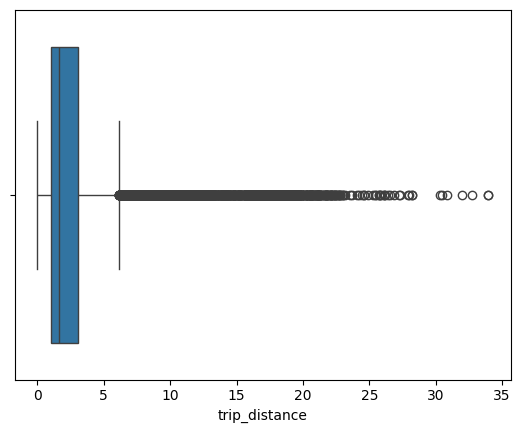

In [16]:
# Box plot of trip_distance
sns.boxplot(data =taxi_2017_raw,
           x = "trip_distance")

<Axes: xlabel='trip_distance'>

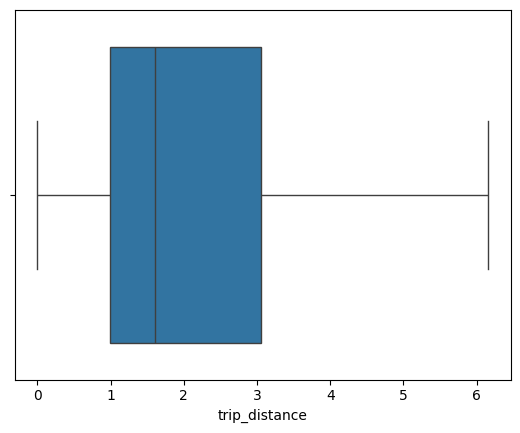

In [17]:
sns.boxplot( data = taxi_2017_raw, 
           x = "trip_distance",
           showfliers = False)

<Axes: xlabel='trip_distance', ylabel='Count'>

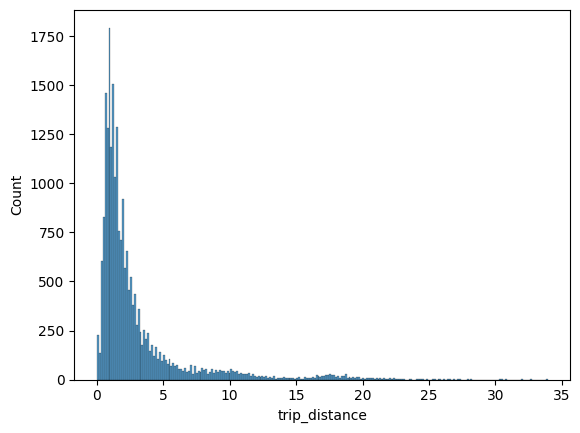

In [19]:
# Histogram of trip_distance

sns.histplot(
    data = taxi_2017_raw, 
    x = "trip_distance")

<Axes: xlabel='trip_distance', ylabel='Count'>

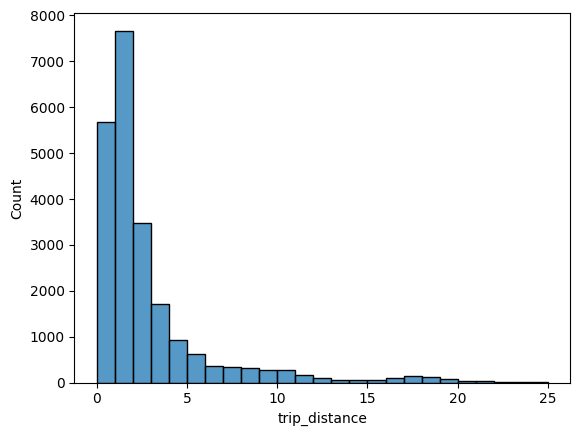

In [20]:
sns.histplot(
    data = taxi_2017_raw, 
    x = "trip_distance",
    bins = range(0,26,1)
)

<Axes: xlabel='total_amount'>

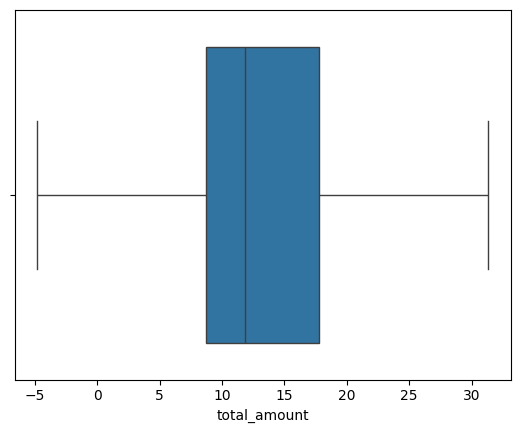

In [21]:
# Box plot of total_amount

sns.boxplot(
    data = taxi_2017_raw,
    x = "total_amount",
    showfliers = False
)

<Axes: xlabel='total_amount', ylabel='Count'>

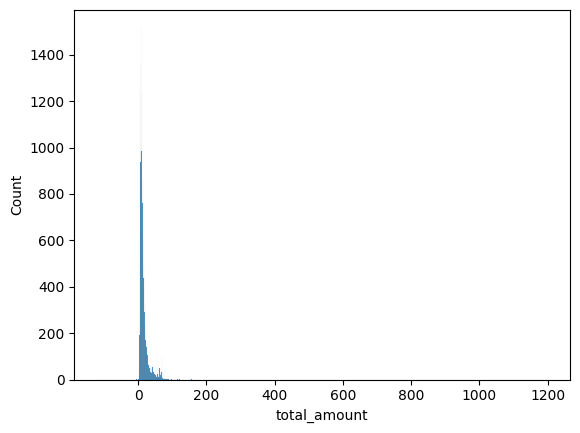

In [23]:
# Histogram of total_amount

sns.histplot(
    data = taxi_2017_raw,
    x = "total_amount"
)

<Axes: xlabel='total_amount', ylabel='Count'>

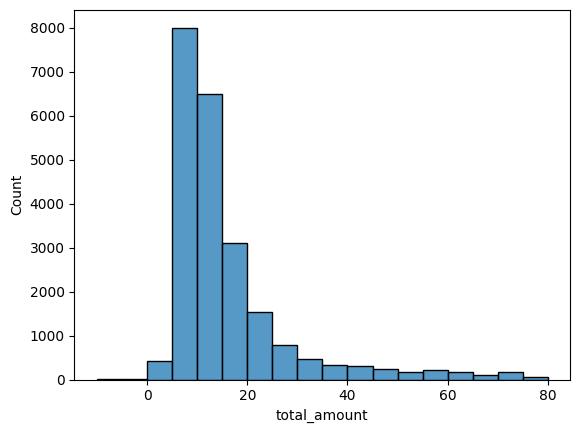

In [24]:
sns.histplot(
    data = taxi_2017_raw,
    x = "total_amount",
    bins = range(-10,81,5)
)

<Axes: xlabel='tip_amount'>

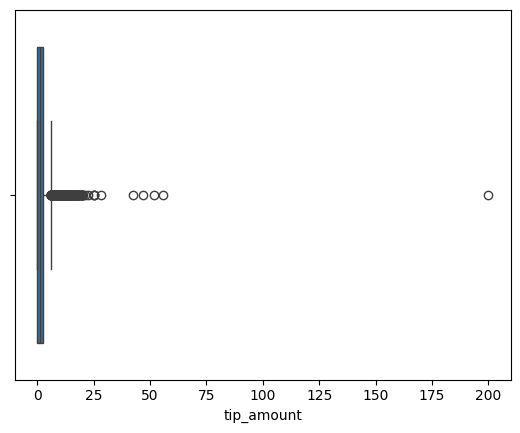

In [27]:
# Box plot of tip_amount
sns.boxplot(
    data = df,
    x = "tip_amount"
)

<Axes: xlabel='tip_amount'>

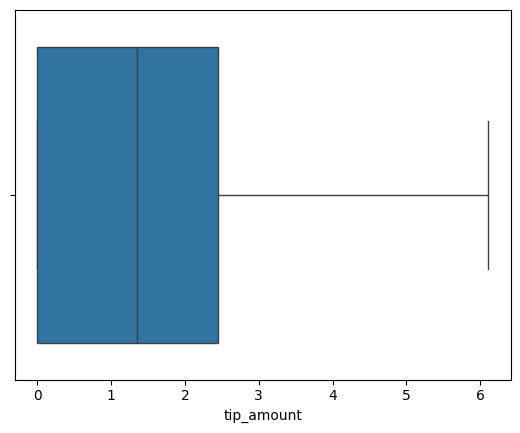

In [28]:
sns.boxplot(
    data = df,
    x = "tip_amount",
    showfliers= False
)

<Axes: xlabel='tip_amount'>

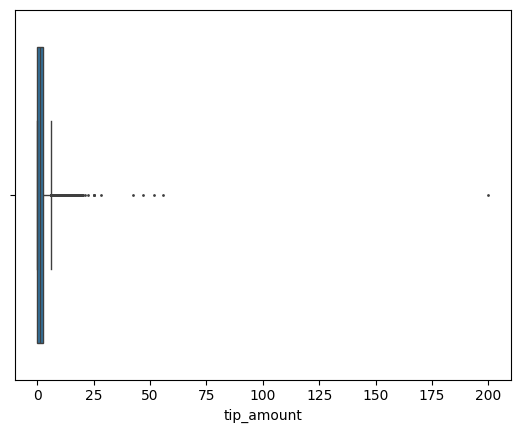

In [29]:
sns.boxplot(
    data = df,
    x = "tip_amount",
    fliersize = 1
)

<Axes: xlabel='tip_amount', ylabel='Count'>

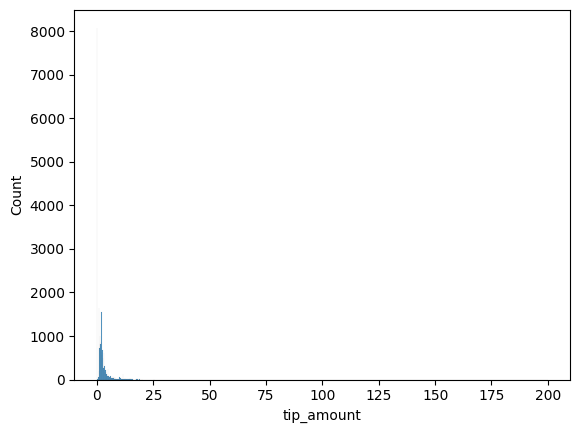

In [30]:
# Histogram of tip_amount

sns.histplot(
    data = df, 
    x = "tip_amount"
)

<Axes: xlabel='tip_amount', ylabel='Count'>

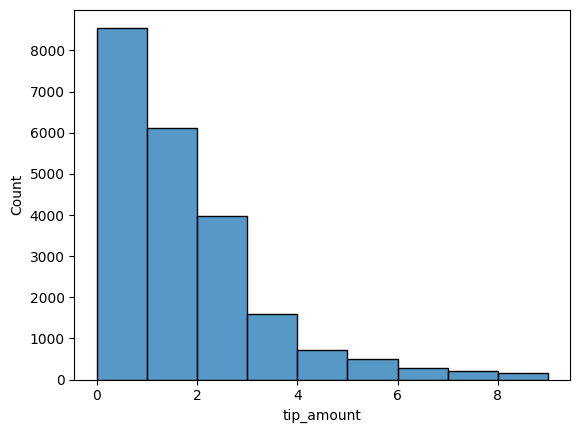

In [31]:
sns.histplot(
    data = df, 
    x = "tip_amount",
    bins = range(0,10,1)
)

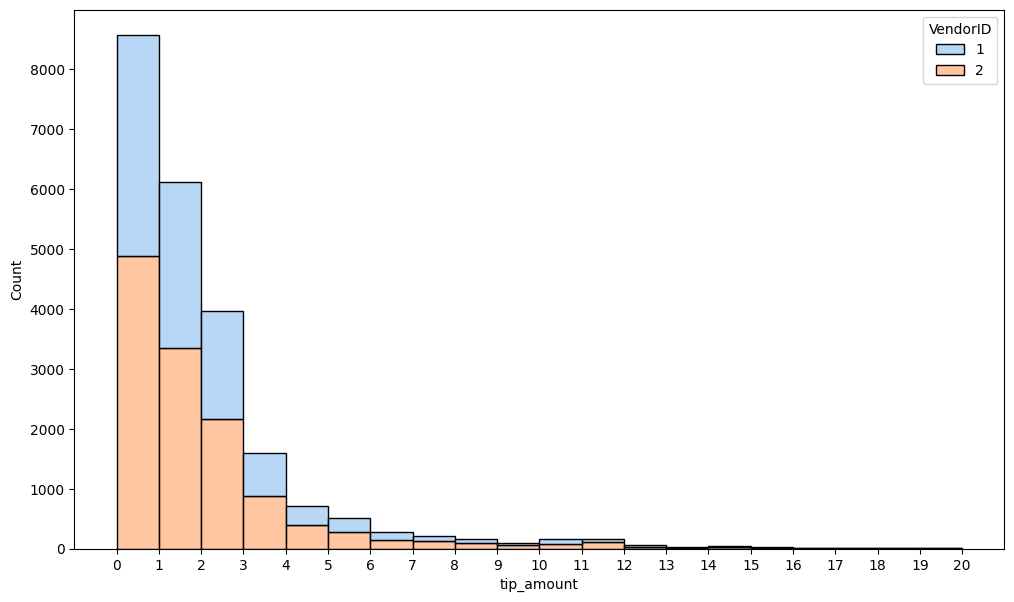

In [33]:
# Histogram of tip_amount by vendor
plt.figure(figsize = (12,7))

ax = sns.histplot(
        data = df,
        x = "tip_amount",
        bins = range(0,21,1),
        hue = "VendorID",
        multiple = "stack",
        palette = "pastel"
    )

ax.set_xticks(range(0,21,1))

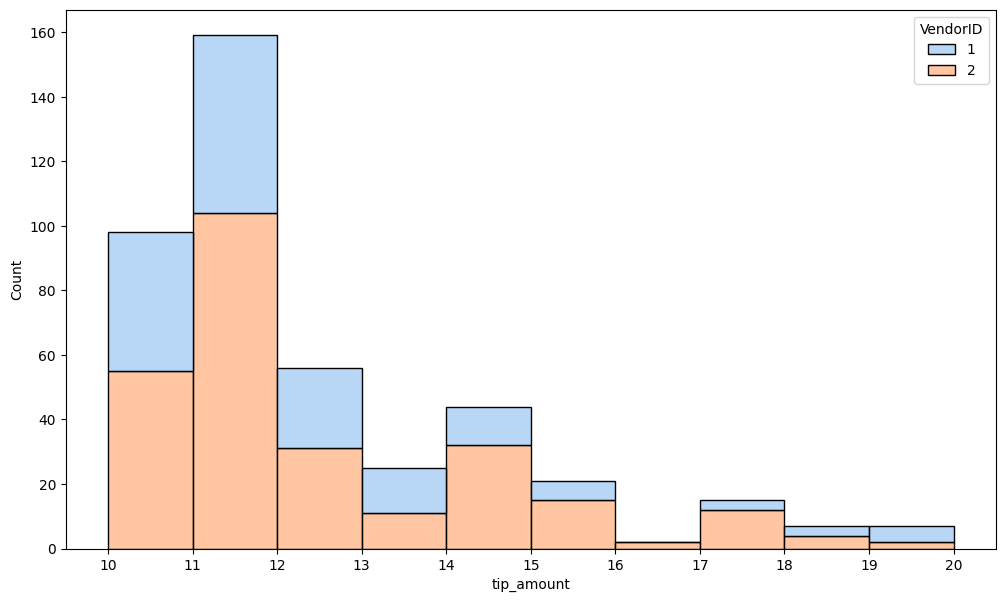

In [34]:
# Histogram of tip_amount by vendor for tips > $10 

tip_higher_10 = df[df["tip_amount"] > 10]

plt.figure( figsize=(12,7))

ax = sns.histplot(
        data = tip_higher_10,
        x = "tip_amount",
        bins = range(10,21,1),
        hue = "VendorID",
        multiple = "stack",
        palette = "pastel"
    )

ax.set_xticks(range(10,21,1))

Mean tips by passenger count

Examine the unique values in the passenger_count column.

In [35]:
df["passenger_count"].unique()


array([6, 1, 2, 4, 5, 3, 0])

In [36]:
df["passenger_count"].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [38]:
# Mean tips by passenger_count

tip_per_passenger_count = df.groupby(["passenger_count"], as_index= False)["tip_amount"].mean().round(3).sort_values(by="tip_amount",ascending = False)
tip_per_passenger_count

,passenger_count,tip_amount
0,0,2.136
5,5,1.873
2,2,1.856
1,1,1.849
6,6,1.720
3,3,1.717
4,4,1.530


<Axes: xlabel='tip_amount'>

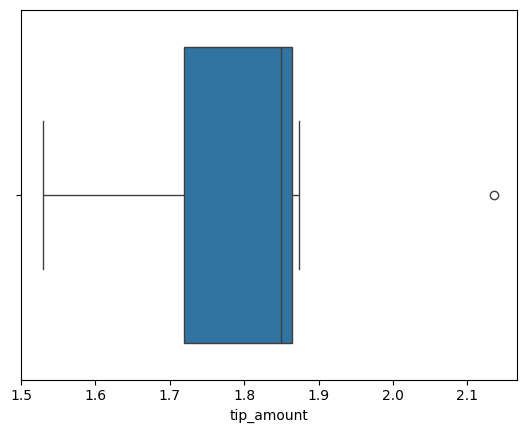

In [39]:
# Bar plot for mean tips by passenger count

sns.boxplot(
    data = tip_per_passenger_count, 
    x = "tip_amount"
)

In [40]:
tip_per_passenger_count

,passenger_count,tip_amount
0,0,2.136
5,5,1.873
2,2,1.856
1,1,1.849
6,6,1.720
3,3,1.717
4,4,1.530


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_10880\2279211596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_10880\2279211596.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_10880\2279211596.py:7: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(


Text(0.5, 1.0, 'Mean tip amount by passenger count')

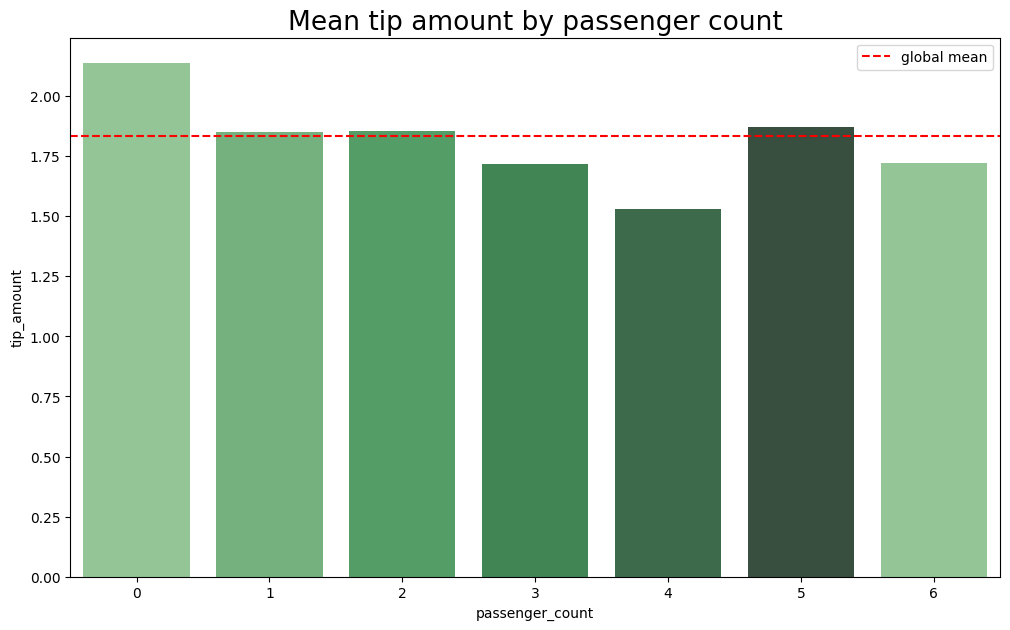

In [41]:
data = tip_per_passenger_count.tail(-1)
color_pal = sns.color_palette("Greens_d",len(data))
rank = data["tip_amount"].argsort().argsort()

plt.figure( figsize = (12,7))

ax = sns.barplot(
    data = tip_per_passenger_count,
    x = "passenger_count",
    y = "tip_amount",
    palette = np.array(color_pal[::-1])[rank]
)

ax.axhline(df["tip_amount"].mean(), ls= "--", color = "red", label = "global mean")
ax.legend()

plt.title("Mean tip amount by passenger count", fontsize = 19)

In [42]:
# Create a month column

df["month"] = df["tpep_pickup_datetime"].dt.month
df["mth"] = df["tpep_pickup_datetime"].dt.month_name()

# Create a day column
df["day"] = df["tpep_pickup_datetime"].dt.day
df["day_"] = df["tpep_pickup_datetime"].dt.day_name()

df.head()

,trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff_date,pickup_date,month,mth,day,day_
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,2017-03-25,2017-03-25,3,March,25,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,2017-04-11,2017-04-11,4,April,11,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,2017-12-15,2017-12-15,12,December,15,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,2017-05-07,2017-05-07,5,May,7,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,2017-04-15,2017-04-15,4,April,15,Saturday


In [43]:
# Get total number of rides for each month

rides_per_month = df.groupby(["mth"], as_index = False)["trip_ID"].count()
rides_per_month

,mth,trip_ID
0,April,2019
1,August,1724
2,December,1863
3,February,1769
4,January,1997
5,July,1697
6,June,1964
7,March,2049
8,May,2013
9,November,1843


In [44]:
rides_per_mth = df["mth"].value_counts()
rides_per_mth

mth
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

<Axes: xlabel='mth', ylabel='trip_ID'>

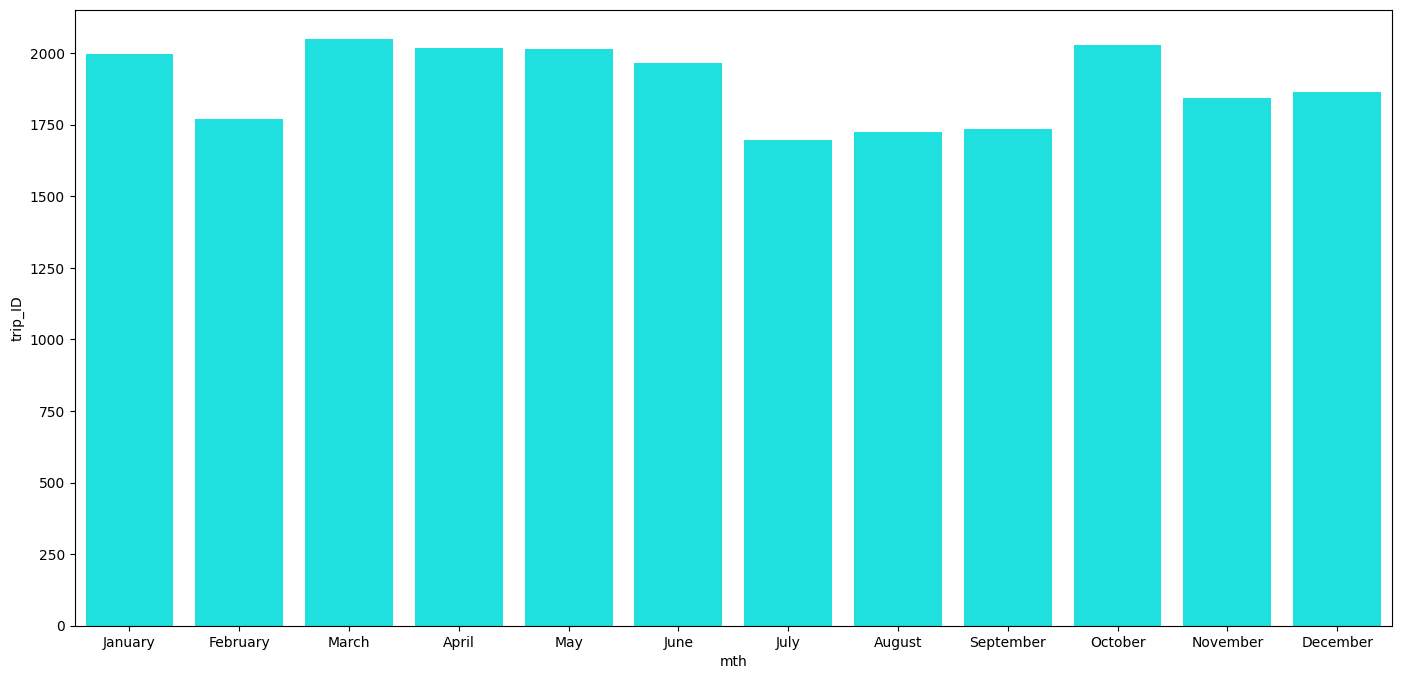

In [45]:
mth_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

# Create a bar plot of total rides per month

plt.figure(figsize = (17,8))
sns.barplot(
    data = rides_per_month,
    x = "mth",
    y = "trip_ID",
    order = mth_order,
    color = "Cyan"
)

Plot total ride count by day

Repeat the above process, but now calculate the total rides by day of the week.

In [46]:
# Rides by day

rides_per_day = df.groupby(["day_"],as_index = False)["trip_ID"].count()
rides_per_day

,day_,trip_ID
0,Friday,3413
1,Monday,2931
2,Saturday,3367
3,Sunday,2998
4,Thursday,3402
5,Tuesday,3198
6,Wednesday,3390


In [47]:
rides_per_day_ = df["day_"].value_counts()
rides_per_day_

day_
Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: count, dtype: int64

<Axes: xlabel='day_', ylabel='count'>

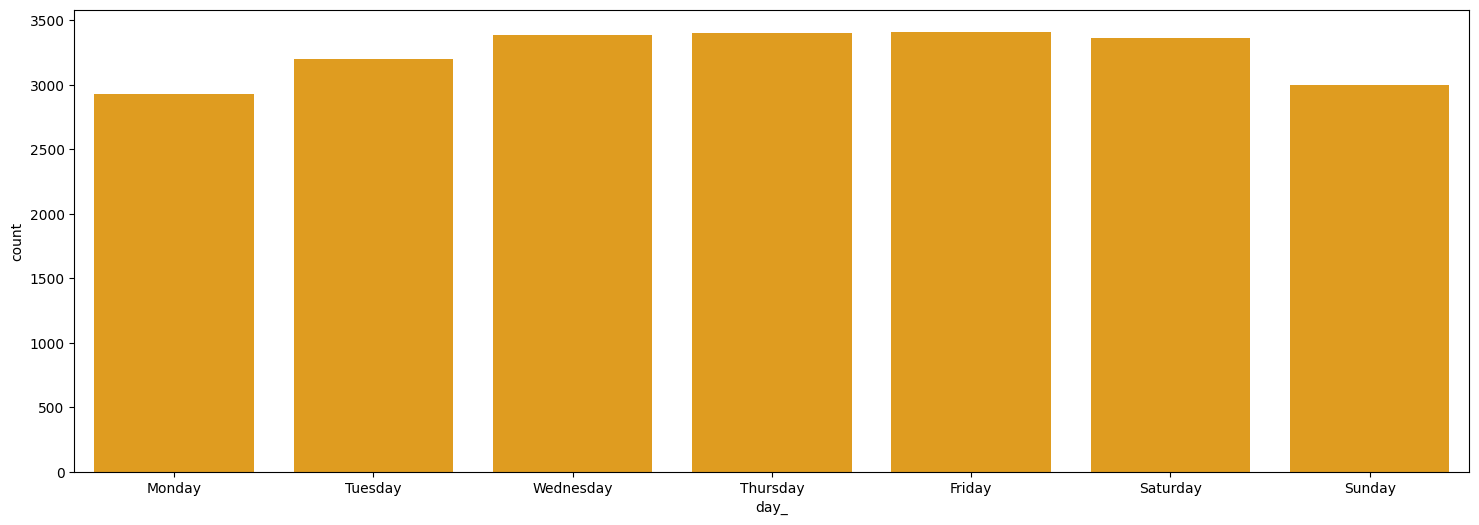

In [48]:
# Bar plot for ride count by day

week_day= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

daily_rides = rides_per_day_.reindex( index = week_day)

plt.figure(figsize = (18,6))

sns.barplot(
    x = daily_rides.index,
    y = daily_rides,
    color = "orange"
)

Plot total revenue by day of the week

Repeat the above process, but now calculate the total revenue by day of the week.

In [50]:
df.head()
# Total revenue by day


week_day= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

daily_revenue = df.groupby(["day_"], as_index= False)["total_amount"].sum()
daily_revenue

,day_,total_amount
0,Friday,55818.74
1,Monday,49574.37
2,Saturday,51195.40
3,Sunday,48624.06
4,Thursday,57181.91
5,Tuesday,52527.14
6,Wednesday,55310.47


<Axes: xlabel='day_', ylabel='total_amount'>

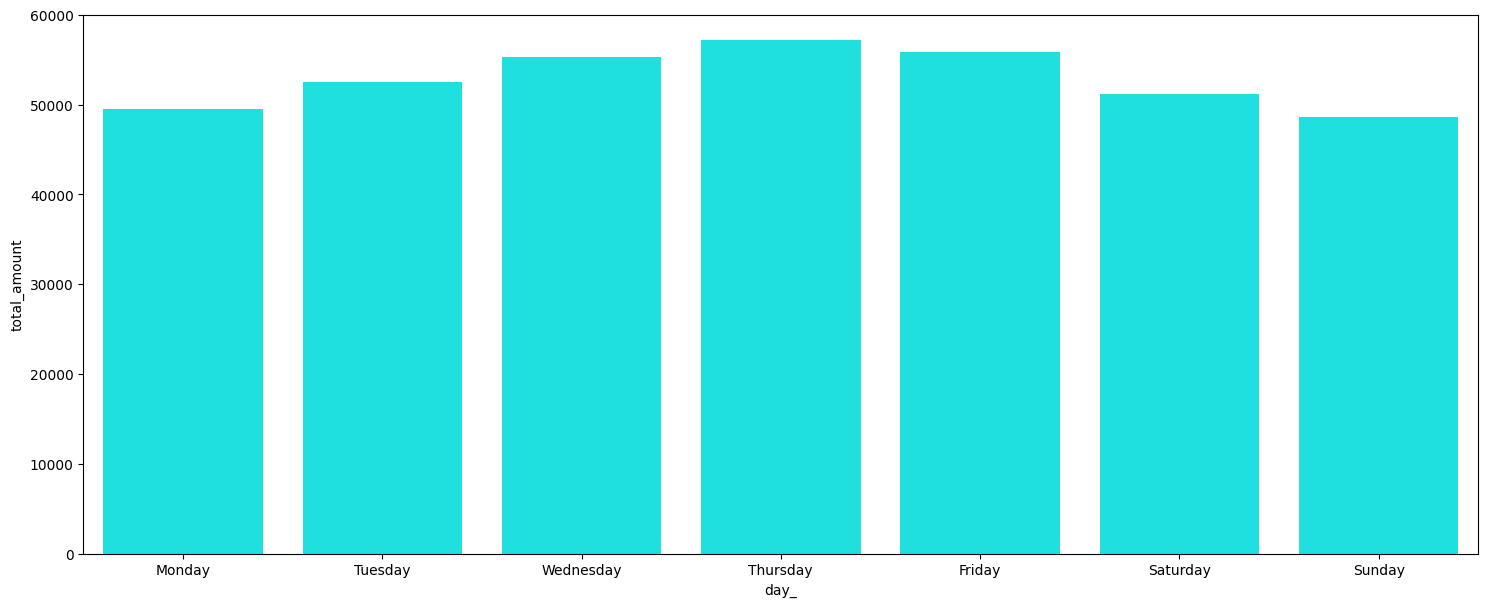

In [51]:
# Bar plot of total revenue by day

plt.figure( figsize = (18,7))

sns.barplot(
    data = daily_revenue,
    x="day_",
    y = "total_amount",
    order = week_day,
    color = "cyan"
)

In [53]:
# Total revenue by month
#==> ENTER YOUR CODE HERE

monthly_revenue = df.groupby(["mth"], as_index = False)["total_amount"].sum()
monthly_revenue

,mth,total_amount
0,April,32012.54
1,August,27759.56
2,December,31261.57
3,February,28937.89
4,January,31735.25
5,July,26617.64
6,June,32920.52
7,March,33085.89
8,May,33828.58
9,November,30800.44


<Axes: xlabel='mth', ylabel='total_amount'>

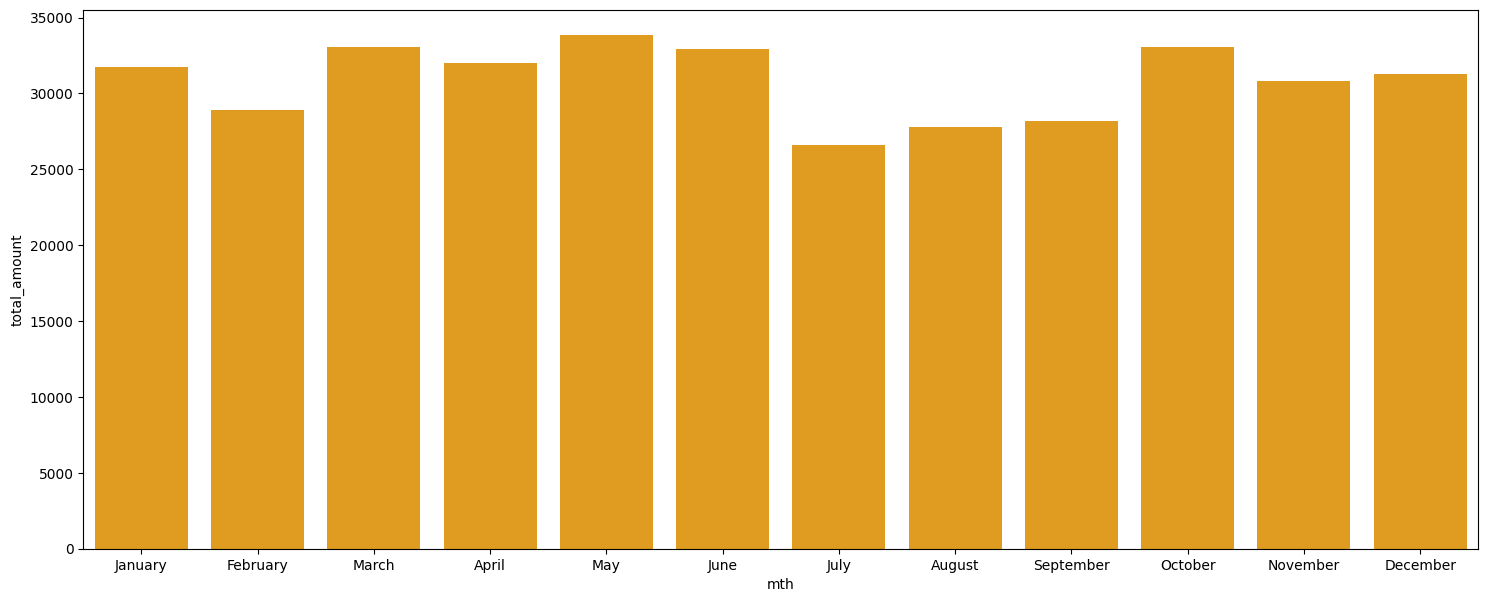

In [54]:
# Bar plot of total revenue by month

plt.figure(figsize = (18,7))

sns.barplot(
    data = monthly_revenue,
    x = "mth",
    y = "total_amount",
    order = mth_order,
    color = "orange"
)

In [55]:
df.head()
# Unique drop-off location IDs

drop_off_loc = df["DOLocationID"].unique()
print(len(drop_off_loc))

216


In [56]:
# Calculate the mean trip distance for each drop-off location
avg_trip_dist_by_doff = df.groupby(["DOLocationID"],as_index= False)["trip_distance"].mean().round(3)

# Sort the results in descending order by mean trip distance
avg_trip_dist_by_doff_desc = avg_trip_dist_by_doff.sort_values(by = "trip_distance", ascending = False)
avg_trip_dist_by_doff_desc

,DOLocationID,trip_distance
16,23,24.275
21,29,21.650
167,210,20.500
5,11,17.945
40,51,17.310
...,...,...
109,137,1.819
189,234,1.728
192,237,1.555
154,193,1.391


<Axes: xlabel='DOLocationID', ylabel='trip_distance'>

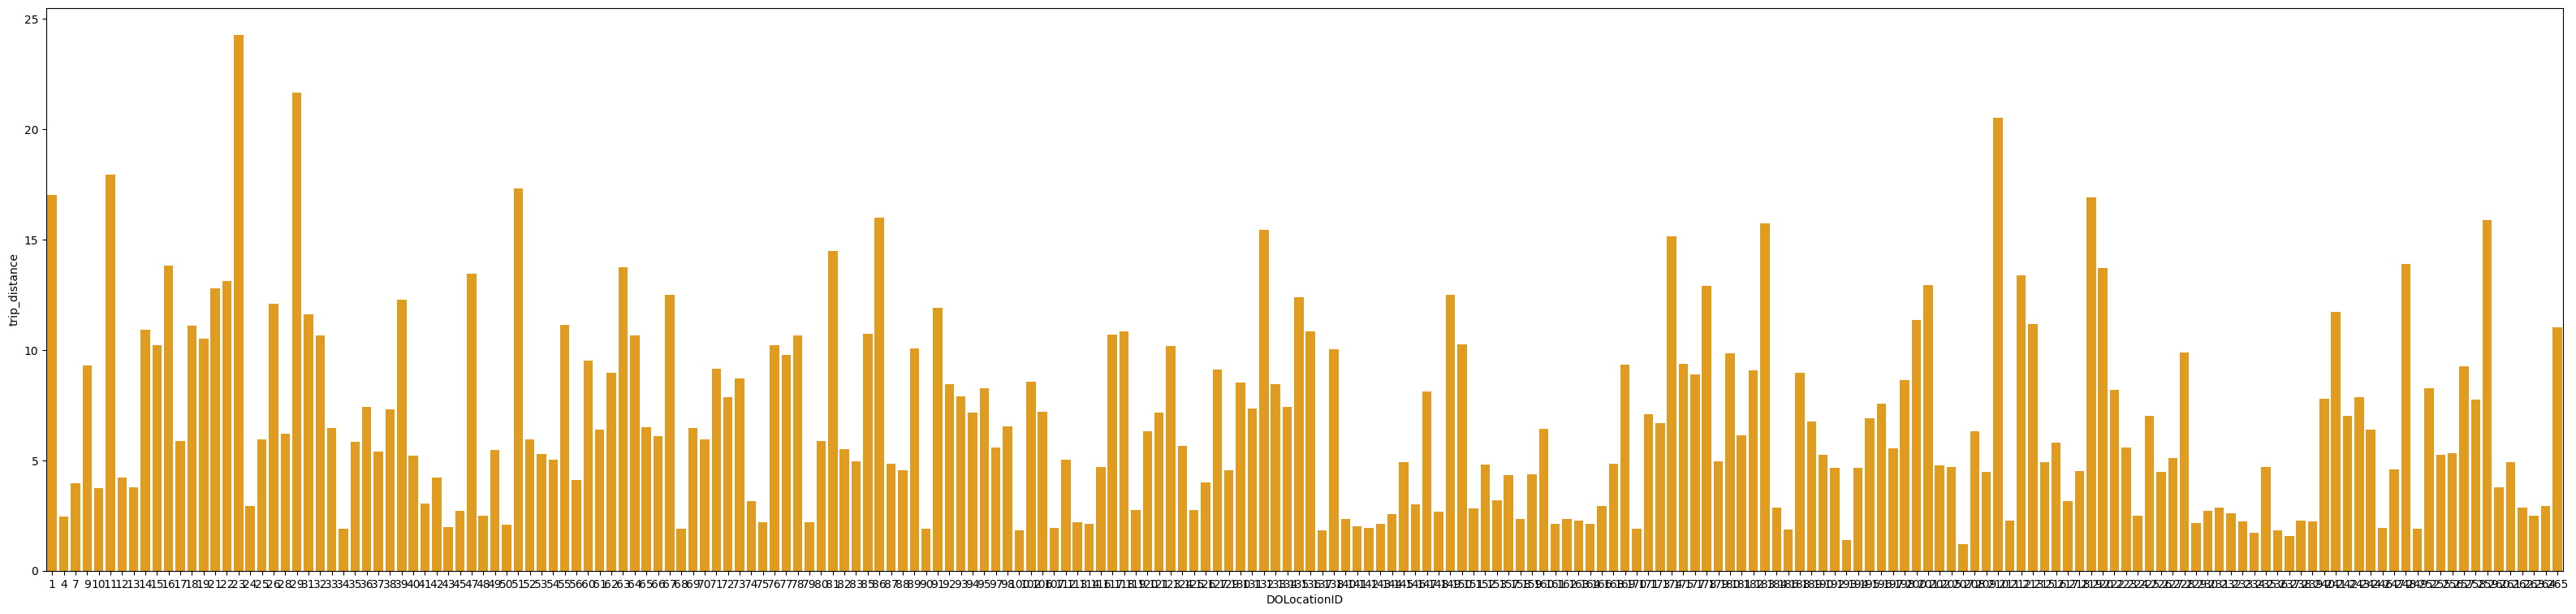

In [57]:
# Bar plot of mean trip distances by drop-off location in ascending order by distance
avg_trip_dist_by_doff_ascn = avg_trip_dist_by_doff.sort_values(by = "trip_distance")

plt.figure( figsize = (40,9))

sns.barplot(
    data = avg_trip_dist_by_doff_ascn,
    x = "DOLocationID",
    y = "trip_distance",
    color = "orange",
)